<a href="https://colab.research.google.com/github/aashasandeep/User-Analytics-in-the-Telecommunication-Industry---Overview/blob/main/Telcom_data_Task_1_new_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import statsmodels.stats.api as sms
import warnings
warnings.filterwarnings("ignore")

In [5]:
Telcom_data = pd.read_excel('/content/Cleaned_telcom_data (1).xlsx')

In [6]:
Telcom_data.head()

Bearer Id               Start  Start ms                 End  \
0  13114483460844900352 2019-04-04 12:01:18       770 2019-04-25 14:35:31   
1  13114483482878900224 2019-04-09 13:04:04       235 2019-04-25 08:15:48   
2  13114483484080500736 2019-04-09 17:42:11         1 2019-04-25 11:58:13   
3  13114483485442799616 2019-04-10 00:31:25       486 2019-04-25 07:36:35   
4  13114483499480700928 2019-04-12 20:10:23       565 2019-04-25 10:40:32   

   End ms  Dur. (ms)             IMSI  MSISDN/Number            IMEI  \
0     662    1823652  208201448079117    33664962239  35521209507511   
1     606    1365104  208201909211140    33681854413  35794009006359   
2     652    1361762  208200314458056    33760627129  35281510359387   
3     171    1321509  208201402342131    33750343200  35356610164913   
4     954    1089009  208201401415120    33699795932  35407009745539   

  Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0   9164566995485190  ...          15854611.0           2501332.0   
1            L77566A  ...          20247395.0          19111729.0   
2            D42335A  ...          19725661.0          14699576.0   
3            T21824A  ...          21388122.0          15146643.0   
4            D88865A  ...          15259380.0          18962873.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0          36749741   
1          1170709.0       526904238.0        15055145.0          53800391   
2           395630.0       410692588.0         4215763.0          27883638   
3         10849722.0       749039933.0        12797283.0          43324218   
4          3529801.0       550709500.0        13910322.0          38542814   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  

[5 rows x 55 columns]

In [7]:
top_10_handsets = Telcom_data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


In [8]:
Telcom_data.shape

(150001, 55)

In [9]:
Telcom_data.isnull().sum()

Bearer Id                                   0
Start                                       0
Start ms                                    0
End                                         0
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)               0
50 Kbps < UL TP < 300 Kbps (%)              0
UL TP > 300 Kbps (%)                        0
HTTP DL (Bytes)                             0
HTTP UL (Bytes)                             0
Activity Duration DL (ms)                   0
Activity Duration UL (ms)                   0
Dur. (ms).1                                 0
Handset Manufacturer                        0
Handset Type                                0
Nb of sec with 125000B < Vol DL             0
Nb of sec with 1250B < Vol UL < 6250B       0
Nb of sec with 31250B < Vol DL < 125000B    0
Nb of sec with 37500B < Vol UL              0
Nb of sec with 6250B < Vol DL < 31250B      0
Nb of sec with 6250B < Vol UL < 37500B      0
Nb of sec with Vol DL < 6250B               0
Nb of sec with Vol UL < 1250B               0
Social Media DL (Bytes)                     0
Social Media UL (Bytes)                     0
Google DL (Bytes)                           0
Google UL (Bytes)                           0
Email DL (Bytes)                            0
Email UL (Bytes)                            0
Youtube DL (Bytes)                          0
Youtube UL (Bytes)                          0
Netflix DL (Bytes)                          0
Netflix UL (Bytes)                          0
Gaming DL (Bytes)                           0
Gaming UL (Bytes)                           0
Other DL (Bytes)                            0
Other UL (Bytes)                            0
Total UL (Bytes)                            0
Total DL (Bytes)                            0
dtype: int64

In [10]:
top_10_handsets.to_csv("top_10_handsets.csv",index=False)

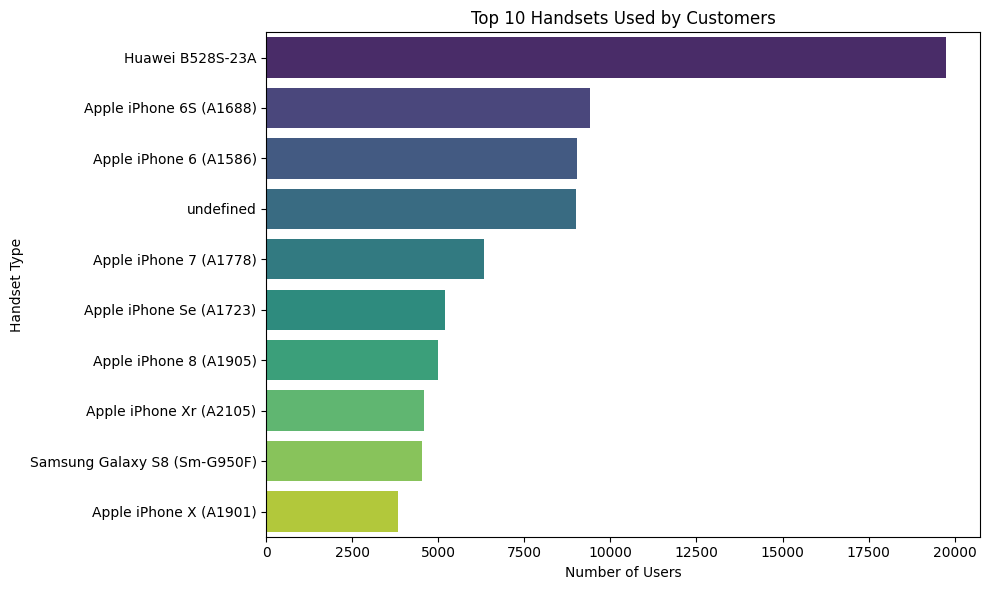

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.tight_layout()
plt.show()

# Explanation:
Huawei B528S-23A is the most popular handset with 19,752 users.

Apple devices dominate the list with seven out of the top ten handsets.

Samsung Galaxy S8 (SM-G950F) is also popular with 4,520 users.

The presence of an undefined handset indicates a need for data cleaning.

Recommendations:
Targeted Marketing for Apple: Focus on upgrade promotions for users with older iPhone models. Highlight the features of newer iPhone models to encourage upgrades.

Competitive Strategies for Samsung: Promote the latest Samsung models, highlighting their advanced features. Implement loyalty programs for existing Samsung users.

Expansion Strategies for Huawei: Promote other Huawei models and introduce new devices targeting the same user base. Address the undefined handsets to convert those users into identifiable handsets for better analysis.

In [12]:
top_3_manufacturers = Telcom_data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


In [13]:
top_3_manufacturers.to_csv("top_3_manufacturers.csv",index=False)

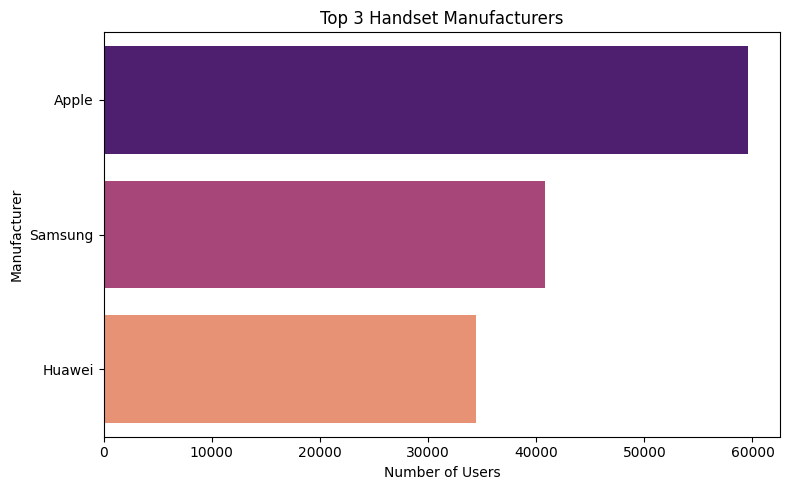

In [14]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_3_manufacturers.values, y=top_3_manufacturers.index, palette='magma')
plt.title('Top 3 Handset Manufacturers')
plt.xlabel('Number of Users')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

#Detailed Interpretation:
Top 3 Handset Manufacturers:

Apple: 59,565 users Samsung: 40,839 users Huawei: 34,423 users ** Sample Interpretation:

From the analysis, we observe that the most popular handsets are predominantly from Apple, Samsung, and Huawei. The top 3 manufacturers account for a significant portion of the market share:

Apple leads with 42.3% of the user base among the top 3 manufacturers. Samsung follows with 29.0%. Huawei holds 24.5%.

Recommendations:
For Apple: Focus on Top Models: Apple's top handsets should be highlighted in marketing campaigns. Emphasize their unique features and benefits to maintain and grow their user base. Loyalty Programs: Introduce loyalty programs and trade-in options to retain existing customers and attract new ones.

For Samsung: Innovative Features: Highlight innovative features in Samsung's top models to differentiate them from competitors. Promotional Offers: Consider promotional offers and bundles to attract customers who might be considering switching from other brands.

For Huawei: Market Penetration: Increase market penetration by targeting regions or demographics where Huawei is less dominant. Customer Support: Strengthen customer support and service options to enhance customer satisfaction and loyalty.

In [15]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = Telcom_data[Telcom_data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets
    print("Top 5 Handsets per Top 3 Manufacturers:")

Top 5 Handsets per Top 3 Manufacturers:
Top 5 Handsets per Top 3 Manufacturers:
Top 5 Handsets per Top 3 Manufacturers:


In [19]:
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nManufacturer: {manufacturer}")
    print(handsets)


Manufacturer: Apple
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Manufacturer: Samsung
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Manufacturer: Huawei
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


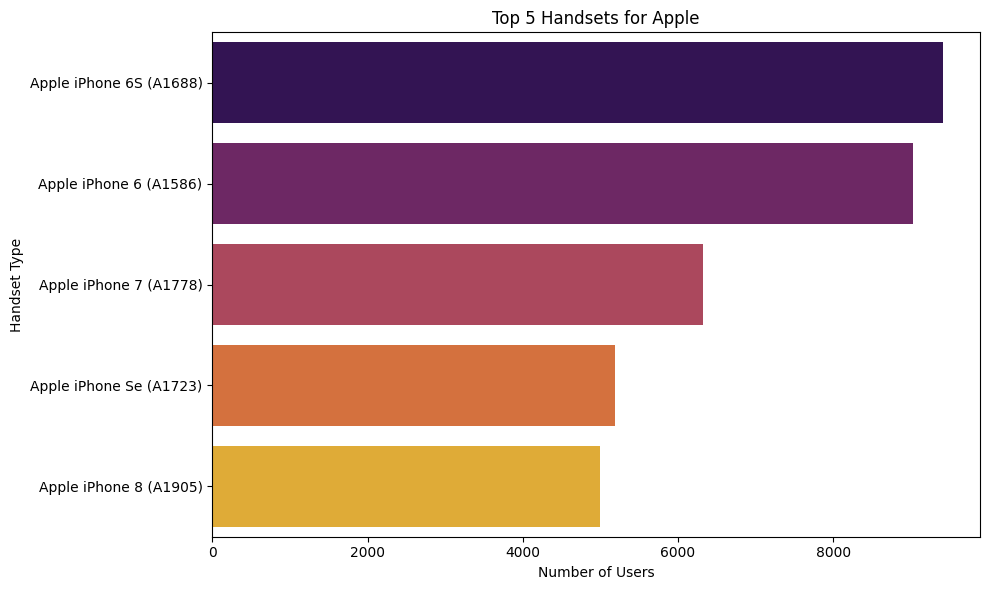

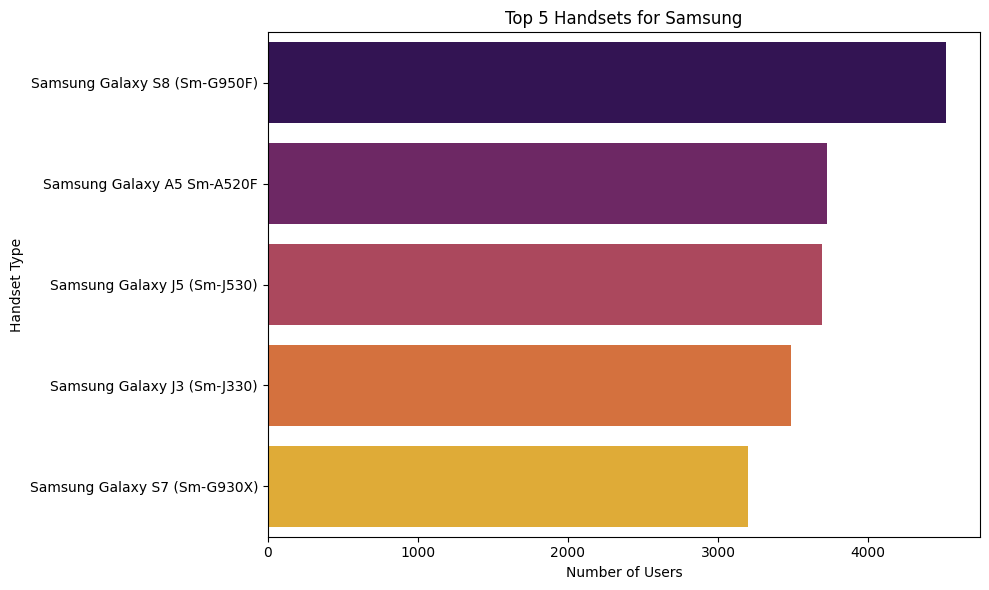

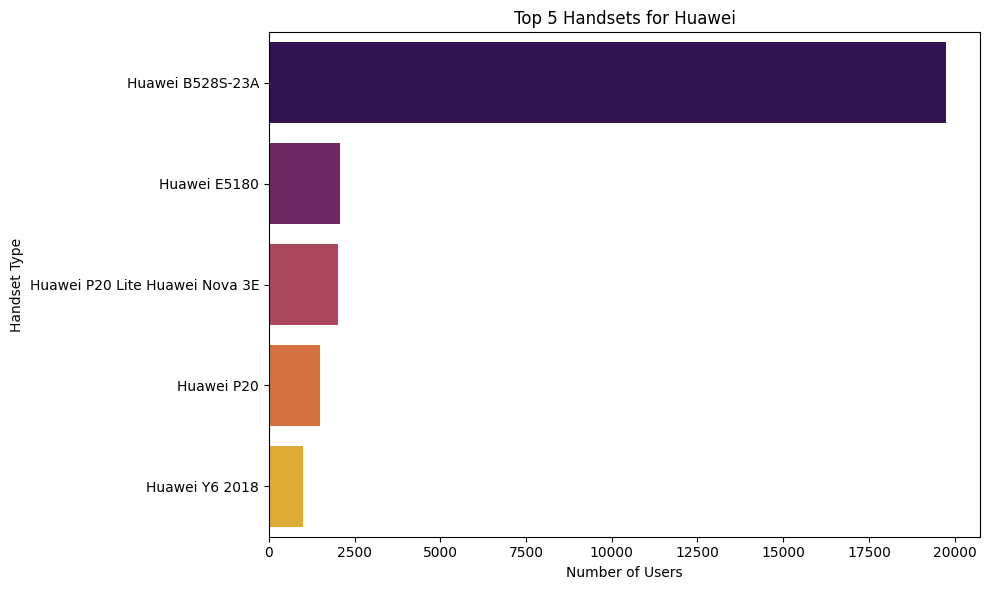

In [20]:
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x=handsets.values, y=handsets.index, palette='inferno')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.xlabel('Number of Users')
    plt.ylabel('Handset Type')
    plt.tight_layout()
    plt.show()

In [21]:
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Summarize data usage for each application
total_usage = Telcom_data[application_columns].sum()
print(total_usage)

Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
Google DL (Bytes)          8.626186e+11
Google UL (Bytes)          3.084833e+11
Email DL (Bytes)           2.687611e+11
Email UL (Bytes)           7.010648e+10
Youtube DL (Bytes)         1.745123e+12
Youtube UL (Bytes)         1.651423e+12
Netflix DL (Bytes)         1.744039e+12
Netflix UL (Bytes)         1.650274e+12
Gaming DL (Bytes)          6.330713e+13
Gaming UL (Bytes)          1.243268e+12
Other DL (Bytes)           6.316550e+13
Other UL (Bytes)           1.239728e+12
dtype: float64


In [22]:
summary_Telcom_data = Telcom_data[application_columns].sum().reset_index()
summary_Telcom_data.columns = ['Application', 'Total Bytes']
summary_Telcom_data['Total MB'] = summary_Telcom_data['Total Bytes'] / (1024 ** 2)  # Convert to MB
summary_Telcom_data = summary_Telcom_data.sort_values(by='Total MB', ascending=False)
print(summary_Telcom_data)

                Application   Total Bytes      Total MB
10        Gaming DL (Bytes)  6.330713e+13  6.037438e+07
12         Other DL (Bytes)  6.316550e+13  6.023932e+07
6        Youtube DL (Bytes)  1.745123e+12  1.664279e+06
8        Netflix DL (Bytes)  1.744039e+12  1.663246e+06
7        Youtube UL (Bytes)  1.651423e+12  1.574919e+06
9        Netflix UL (Bytes)  1.650274e+12  1.573824e+06
11        Gaming UL (Bytes)  1.243268e+12  1.185673e+06
13         Other UL (Bytes)  1.239728e+12  1.182297e+06
2         Google DL (Bytes)  8.626186e+11  8.226572e+05
3         Google UL (Bytes)  3.084833e+11  2.941926e+05
0   Social Media DL (Bytes)  2.693001e+11  2.568246e+05
4          Email DL (Bytes)  2.687611e+11  2.563106e+05
5          Email UL (Bytes)  7.010648e+10  6.685875e+04
1   Social Media UL (Bytes)  4.939298e+09  4.710482e+03


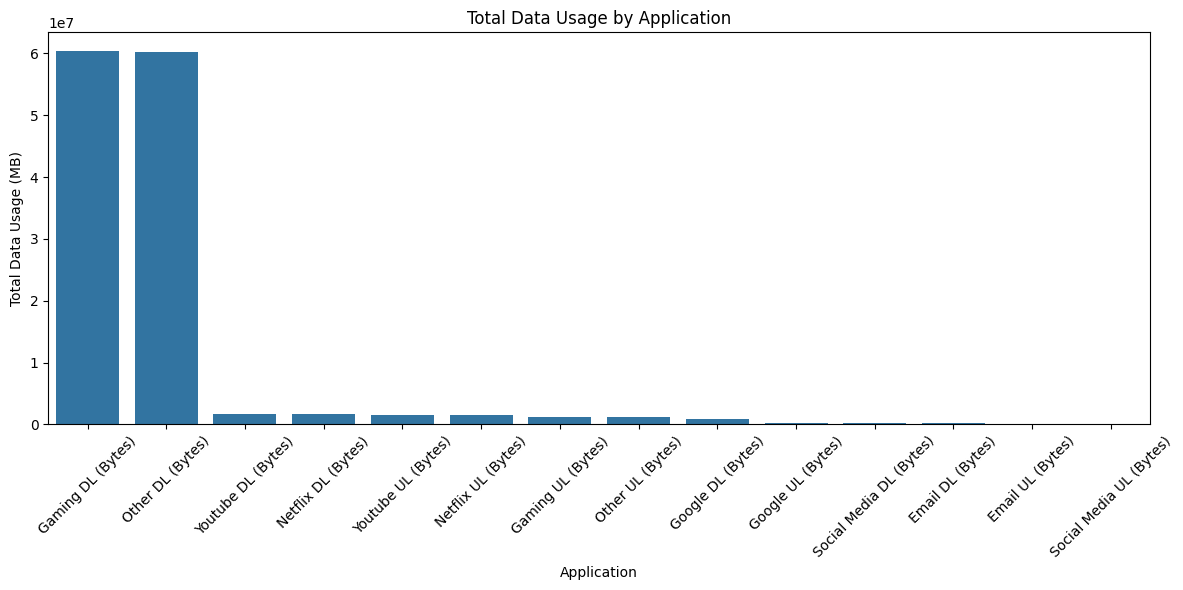

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Application', y='Total MB', data=summary_Telcom_data )
plt.title('Total Data Usage by Application')
plt.xlabel('Application')
plt.ylabel('Total Data Usage (MB)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation
Social Media: High data consumption indicates strong engagement with social platforms.

YouTube and Netflix: Significant data usage reflects users' preference for video streaming services.

Google Services: Usage patterns suggest reliance on various Google applications for daily activities.

4.Gaming: Notable data consumption indicates a growing trend in mobile gaming.

Recommendations to Marketing Teams
Targeted Campaigns: Develop marketing campaigns focused on the most popular applications. Highlight how your services enhance the experience on these platforms. Partnerships: Collaborate with social media platforms, YouTube, and Netflix to offer bundled promotions or exclusive content to your users. User Retention: Provide data packages tailored to heavy users of video streaming and gaming applications to retain high-consumption users. Enhanced User Experience: Optimize network performance and ensure low latency for popular applications to improve user satisfaction and reduce churn. Market Segmentation: Segment your user base by data usage patterns and create personalized offers. For example, offer additional benefits to users who are heavy consumers of social media or streaming services.

In [24]:
social_media_usage = Telcom_data[['Social Media DL (Bytes)', 'Social Media UL (Bytes)']].sum()
print(social_media_usage)

Social Media DL (Bytes)    2.693001e+11
Social Media UL (Bytes)    4.939298e+09
dtype: float64


In [25]:
for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']:
    Telcom_data[f'{app} Total (Bytes)'] = Telcom_data[f'{app} DL (Bytes)'] + Telcom_data[f'{app} UL (Bytes)']

In [26]:
user_behavior = Telcom_data.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',    # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    **{col: 'sum' for col in application_columns},  # Total data volume for each application
    **{f'{app} Total (Bytes)': 'sum' for app in ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']}
}).reset_index()

In [27]:
user_behavior.rename(columns={
    'Bearer_Id': 'Number of xDR Sessions'
}, inplace=True)

print(user_behavior.head())

   MSISDN/Number  Bearer Id  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0    33601001722          1     116720      8.426375e+08          36053108   
1    33601001754          1     181230      1.207552e+08          36104459   
2    33601002511          1     134969      5.566597e+08          39306820   
3    33601007832          1      49878      4.019932e+08          20327526   
4    33601008617          2      37104      1.363130e+09          94280527   

   Social Media DL (Bytes)  Social Media UL (Bytes)  Google DL (Bytes)  \
0                2206504.0                  25631.0          3337123.0   
1                2598548.0                  62017.0          4197697.0   
2                3148004.0                  47619.0          3343483.0   
3                 251469.0                  28825.0          5937765.0   
4                2861230.0                  51312.0         13728668.0   

   Google UL (Bytes)  Email DL (Bytes)  ...  Gaming UL (Bytes)  \
0          1051882.0

In [28]:
user_behavior.rename(columns={
    'Dur. (ms)': 'Total Session Duration (ms)'
}, inplace=True)

print(user_behavior.head())

   MSISDN/Number  Bearer Id  Total Session Duration (ms)  Total DL (Bytes)  \
0    33601001722          1                       116720      8.426375e+08   
1    33601001754          1                       181230      1.207552e+08   
2    33601002511          1                       134969      5.566597e+08   
3    33601007832          1                        49878      4.019932e+08   
4    33601008617          2                        37104      1.363130e+09   

   Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
0          36053108                2206504.0                  25631.0   
1          36104459                2598548.0                  62017.0   
2          39306820                3148004.0                  47619.0   
3          20327526                 251469.0                  28825.0   
4          94280527                2861230.0                  51312.0   

   Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  ...  \
0          3337123.0      

In [29]:
Telcom_data = Telcom_data.drop(['Start', 'End', 'Last Location Name', 'Handset Type', 'Handset Manufacturer'], axis=1)

In [30]:
Telcom_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)             IMSI  \
0  13114483460844900352       770     662    1823652  208201448079117   
1  13114483482878900224       235     606    1365104  208201909211140   
2  13114483484080500736         1     652    1361762  208200314458056   
3  13114483485442799616       486     171    1321509  208201402342131   
4  13114483499480700928       565     954    1089009  208201401415120   

   MSISDN/Number            IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0    33664962239  35521209507511               42                5   
1    33681854413  35794009006359               65                5   
2    33760627129  35281510359387               45                5   
3    33750343200  35356610164913               45                5   
4    33699795932  35407009745539               45                5   

   Avg Bearer TP DL (kbps)  ...  Other UL (Bytes)  Total UL (Bytes)  \
0                       23  ...         8814393.0          36749741   
1                       16  ...        15055145.0          53800391   
2                        6  ...         4215763.0          27883638   
3                       44  ...        12797283.0          43324218   
4                        6  ...        13910322.0          38542814   

   Total DL (Bytes)  Social Media Total (Bytes)  Google Total (Bytes)  \
0       308879636.0                   1570185.0             2905912.0   
1       653384965.0                   1933278.0             4414096.0   
2       279807335.0                   1726277.0            10229119.0   
3       846028530.0                    657493.0            11811761.0   
4       569138589.0                    912788.0             7748843.0   

   Email Total (Bytes)  Youtube Total (Bytes)  Netflix Total (Bytes)  \
0            3701304.0             18355943.0             17855187.0   
1             937385.0             39359124.0             35565545.0   
2            3363124.0             34425237.0             23751202.0   
3            2070983.0             36534765.0             15092588.0   
4            2110349.0             34222253.0             17539799.0   

   Gaming Total (Bytes)  Other Total (Bytes)  
0           292426453.0          180558843.0  
1           609920783.0          541959383.0  
2           229980251.0          414908351.0  
3           810387875.0          761837216.0  
4           531237049.0          564619822.0  

[5 rows x 57 columns]

In [31]:
# Drop missing values in identification columns
identification_columns = ['IMSI', 'MSISDN/Number', 'IMEI']
Cleaned_Telcom_data = Telcom_data.dropna(subset=identification_columns)
Telcom_data = Cleaned_Telcom_data

In [32]:
# Assuming you have defined the fix_missing_ffill function
def fix_missing_ffill(Telcom_data, column):
    Telcom_data[column].fillna(method='ffill', inplace=True)
    return Telcom_data

# Assuming you have a DataFrame called 'clean_df'
percentage_metrics_columns = ['DL TP < 50 Kbps (%)', 'UL TP > 300 Kbps (%)']
for col in percentage_metrics_columns:
    Telcom_data = fix_missing_ffill(Telcom_data, col)

# Display the resulting DataFrame
Telcom_data.head()

Bearer Id  Start ms  End ms  Dur. (ms)             IMSI  \
0  13114483460844900352       770     662    1823652  208201448079117   
1  13114483482878900224       235     606    1365104  208201909211140   
2  13114483484080500736         1     652    1361762  208200314458056   
3  13114483485442799616       486     171    1321509  208201402342131   
4  13114483499480700928       565     954    1089009  208201401415120   

   MSISDN/Number            IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0    33664962239  35521209507511               42                5   
1    33681854413  35794009006359               65                5   
2    33760627129  35281510359387               45                5   
3    33750343200  35356610164913               45                5   
4    33699795932  35407009745539               45                5   

   Avg Bearer TP DL (kbps)  ...  Other UL (Bytes)  Total UL (Bytes)  \
0                       23  ...         8814393.0          36749741   
1                       16  ...        15055145.0          53800391   
2                        6  ...         4215763.0          27883638   
3                       44  ...        12797283.0          43324218   
4                        6  ...        13910322.0          38542814   

   Total DL (Bytes)  Social Media Total (Bytes)  Google Total (Bytes)  \
0       308879636.0                   1570185.0             2905912.0   
1       653384965.0                   1933278.0             4414096.0   
2       279807335.0                   1726277.0            10229119.0   
3       846028530.0                    657493.0            11811761.0   
4       569138589.0                    912788.0             7748843.0   

   Email Total (Bytes)  Youtube Total (Bytes)  Netflix Total (Bytes)  \
0            3701304.0             18355943.0             17855187.0   
1             937385.0             39359124.0             35565545.0   
2            3363124.0             34425237.0             23751202.0   
3            2070983.0             36534765.0             15092588.0   
4            2110349.0             34222253.0             17539799.0   

   Gaming Total (Bytes)  Other Total (Bytes)  
0           292426453.0          180558843.0  
1           609920783.0          541959383.0  
2           229980251.0          414908351.0  
3           810387875.0          761837216.0  
4           531237049.0          564619822.0  

[5 rows x 57 columns]

In [33]:
# Impute missing values in general download/upload columns using mean
general_columns = ['Total UL (Bytes)', 'Total DL (Bytes)']
for col in general_columns:
    Telcom_data[col] = Telcom_data[col].fillna(Telcom_data[col].mean())

Telcom_data[col]

0         308879636.0
1         653384965.0
2         279807335.0
3         846028530.0
4         569138589.0
             ...     
149996    574175259.0
149997    666648844.0
149998    592786405.0
149999    371895920.0
150000    455841077.5
Name: Total DL (Bytes), Length: 150001, dtype: float64

In [34]:
dispersion_params = Telcom_data.select_dtypes(include=['float64', 'int64']).agg(['mean', 'std', 'var', 'min', 'max'])
print(dispersion_params)

          Start ms        End ms     Dur. (ms)          IMSI  MSISDN/Number  \
mean    499.188199    498.800888  1.046084e+05  2.082016e+14   4.182441e+10   
std     288.610872    288.096693  8.103736e+04  2.144723e+10   2.438731e+12   
var   83296.235554  82999.704454  6.567055e+09  4.599835e+20   5.947411e+24   
min       0.000000      0.000000  7.142000e+03  2.040471e+14   3.360100e+10   
max     999.000000    999.000000  1.859336e+06  2.140743e+14   8.823971e+14   

              IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
mean  4.842592e+13        97.774455        15.315031             1.329996e+04   
std   2.238739e+13       559.909444        76.687998             2.397182e+04   
var   5.011953e+26    313498.585409      5881.048988             5.746483e+08   
min   4.400152e+11         0.000000         0.000000             0.000000e+00   
max   9.900120e+13     96923.000000      7120.000000             3.781600e+05   

      Avg Bearer TP UL (kbps)  ...  Ot

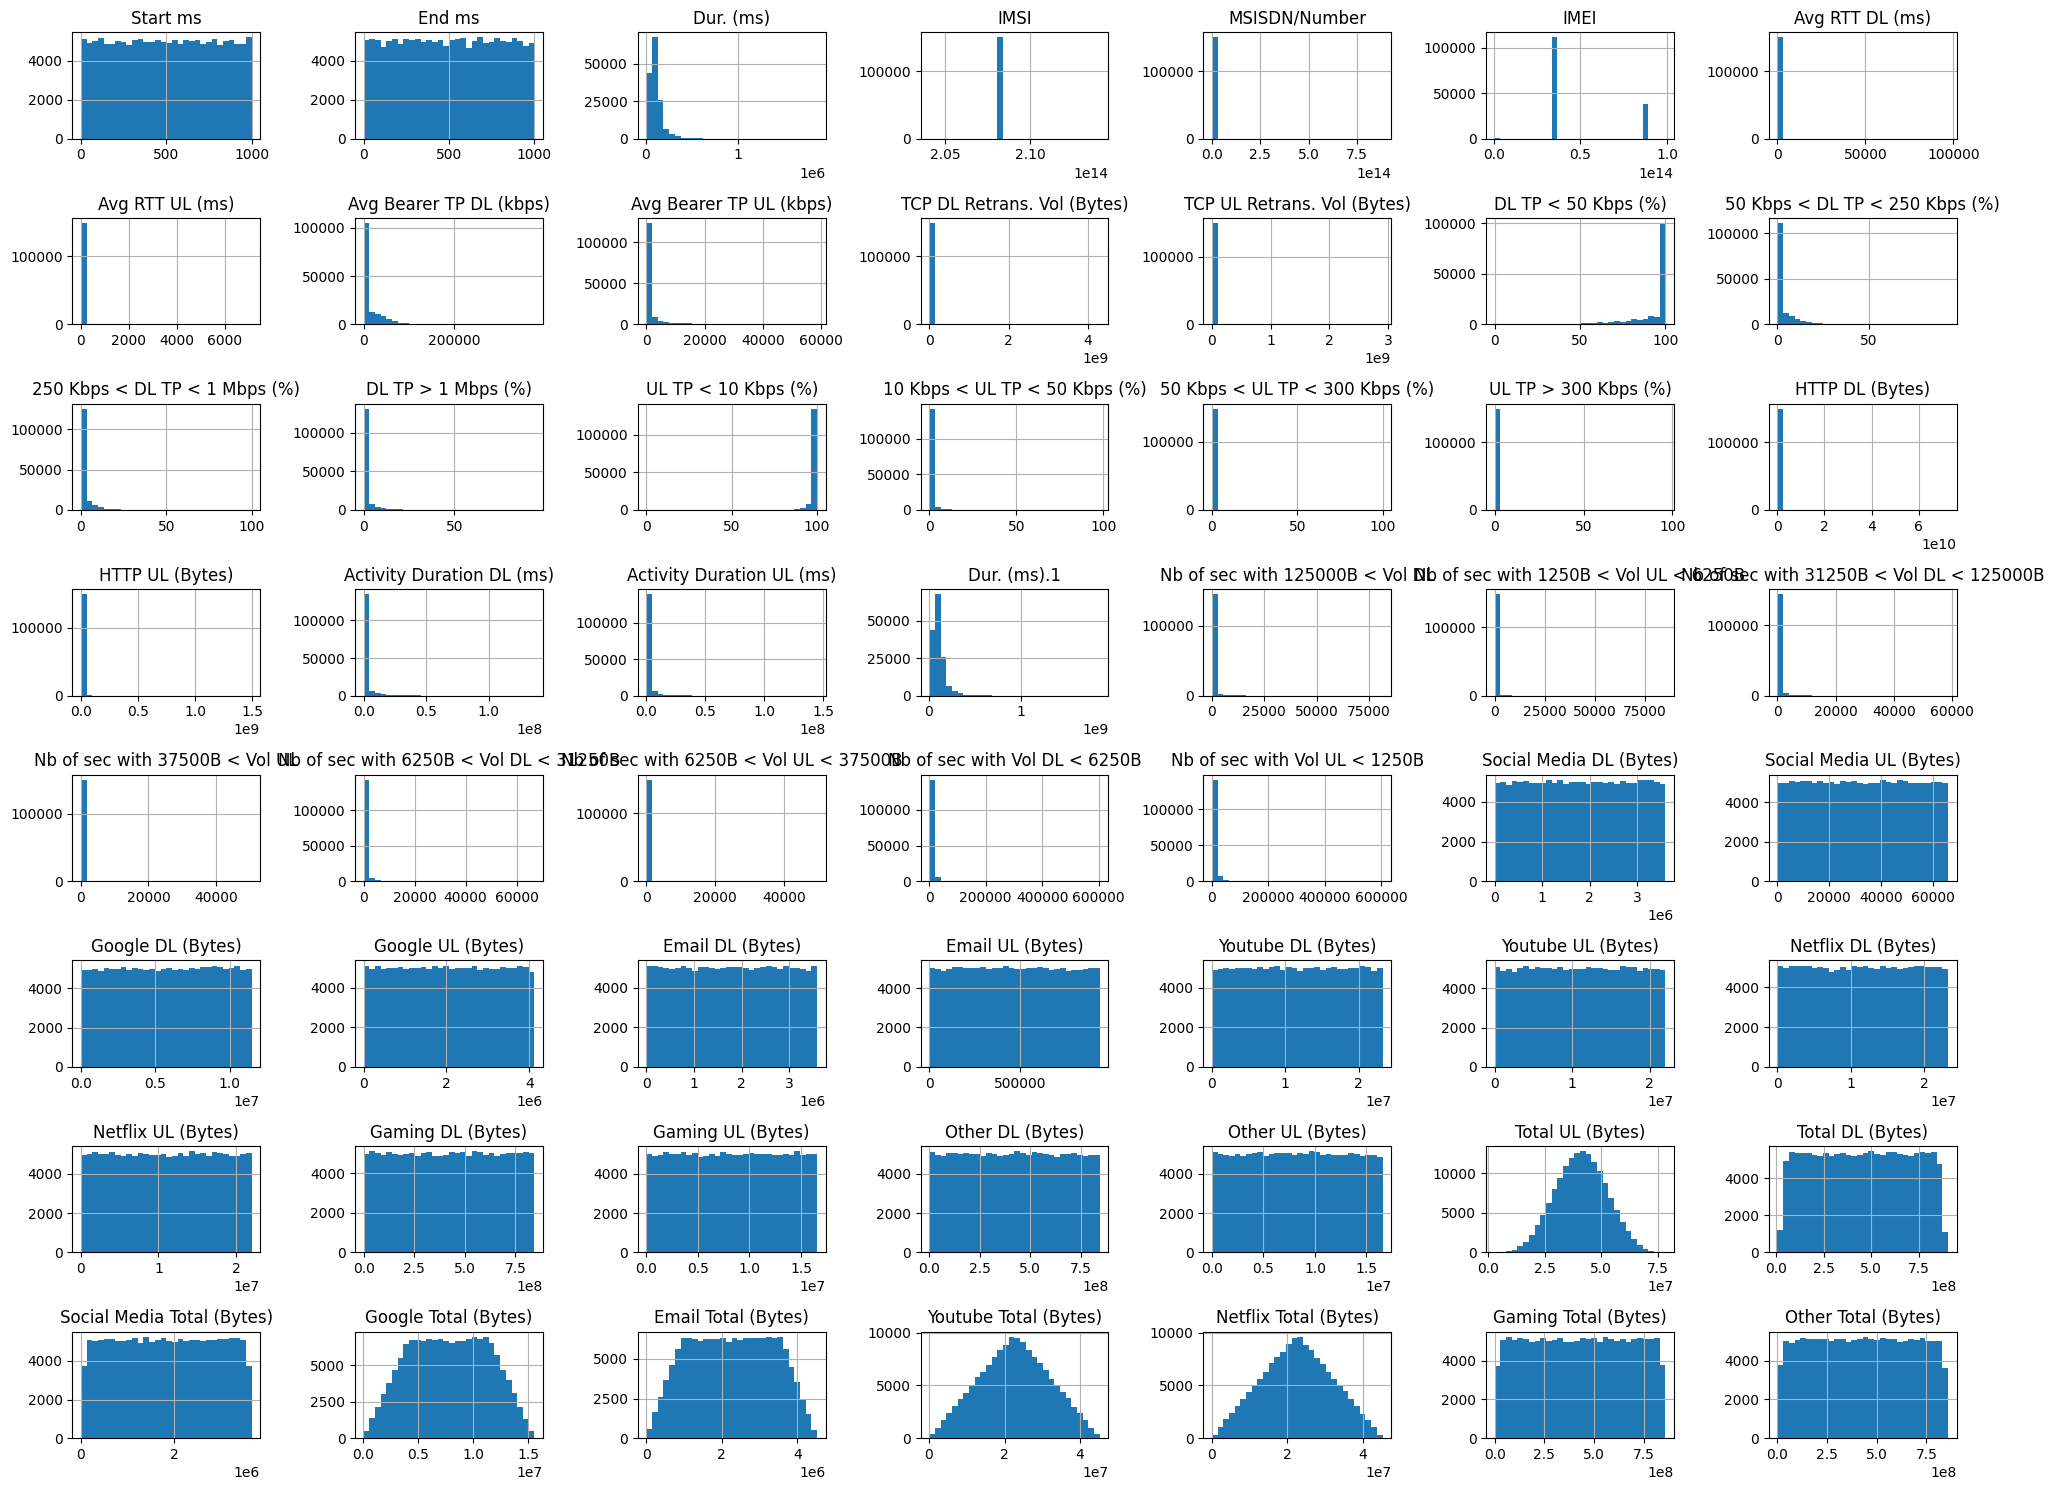

In [35]:
Telcom_data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

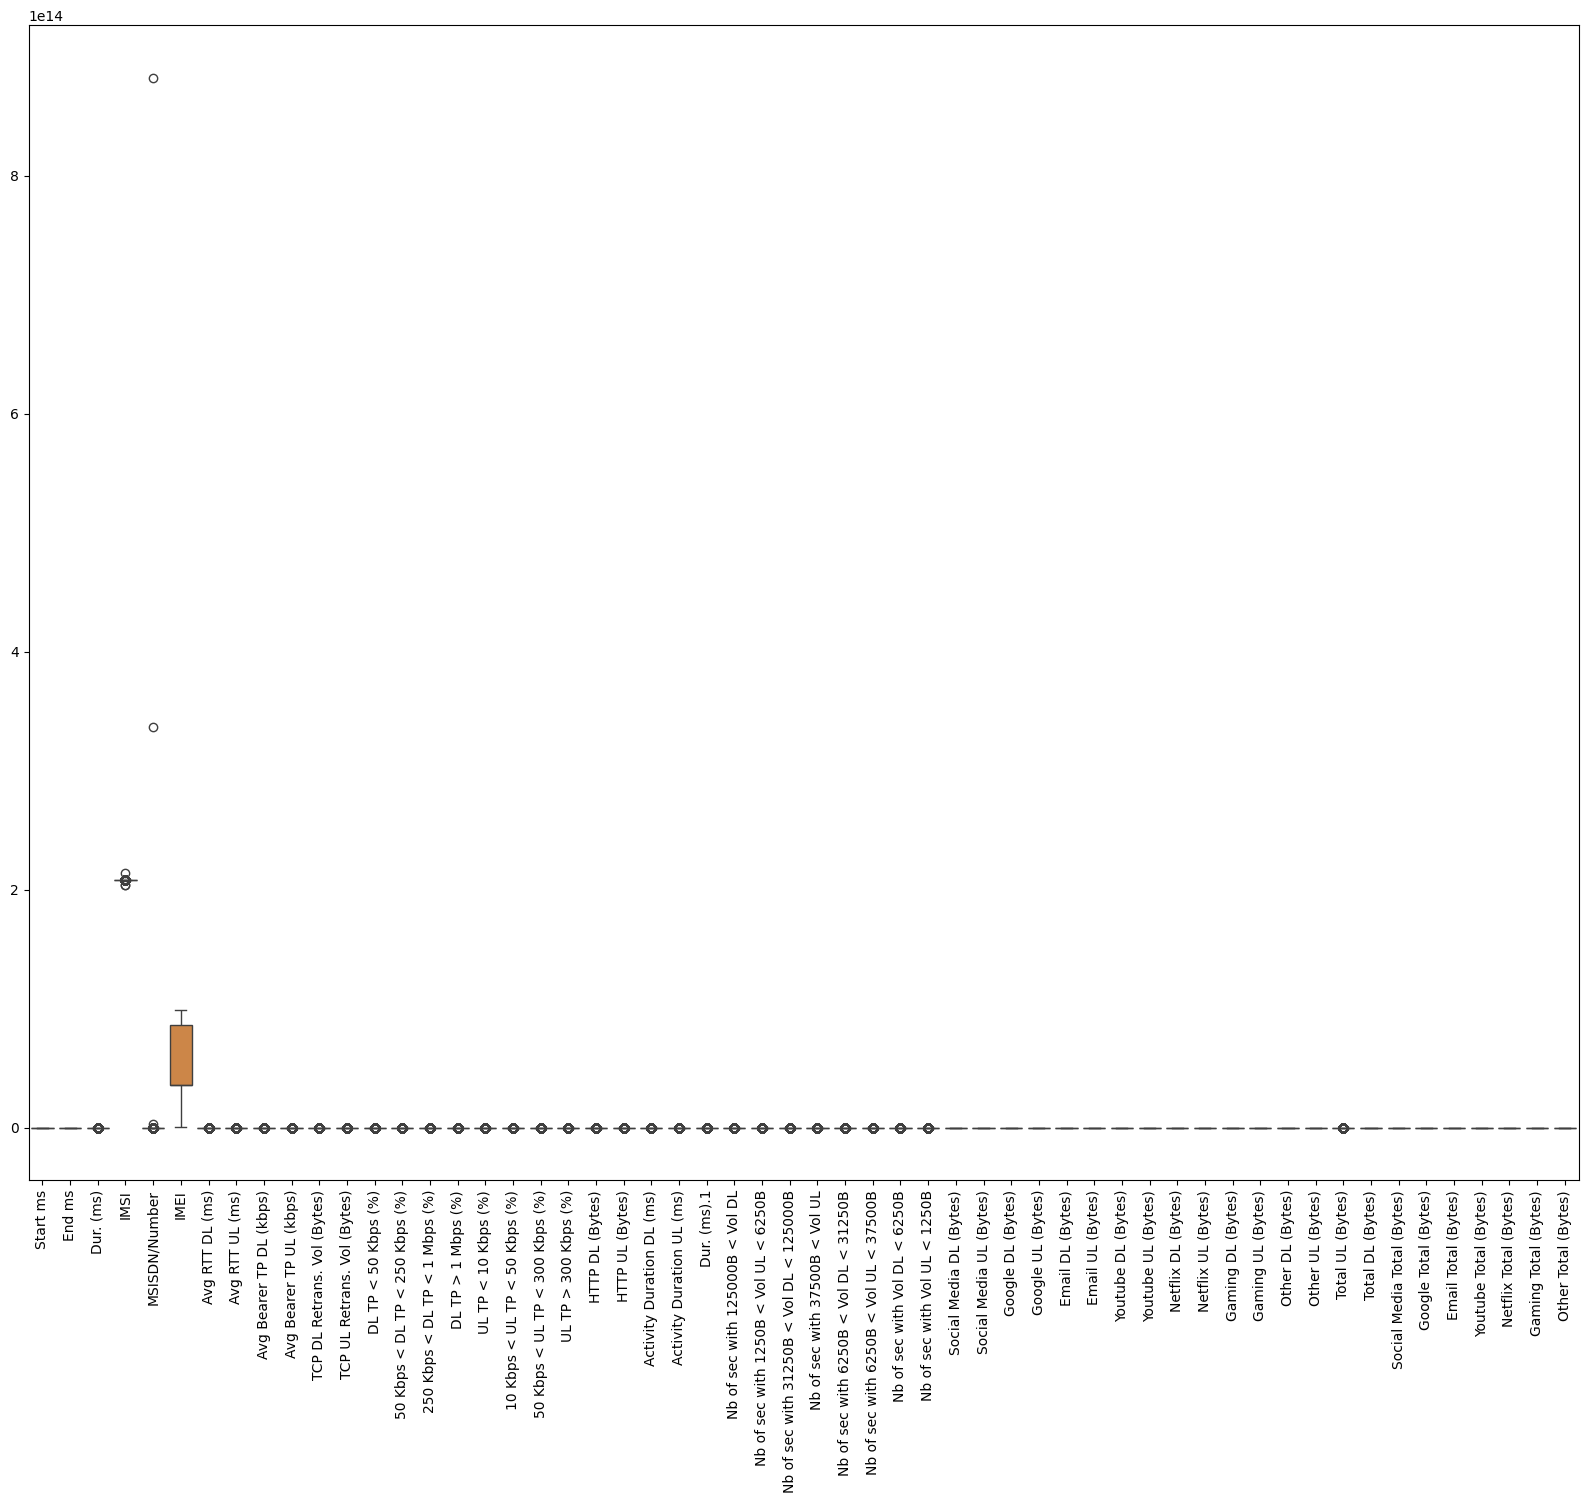

In [36]:
# Boxplots for identifying outliers
plt.figure(figsize=(20, 15))
sns.boxplot(data=Telcom_data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.show()

# Bivariate Analysis

Relationships between applications and total DL+UL data.

In [37]:
Telcom_data['total_data'] = Telcom_data[['Total DL (Bytes)', 'Total UL (Bytes)']].sum(axis=1)

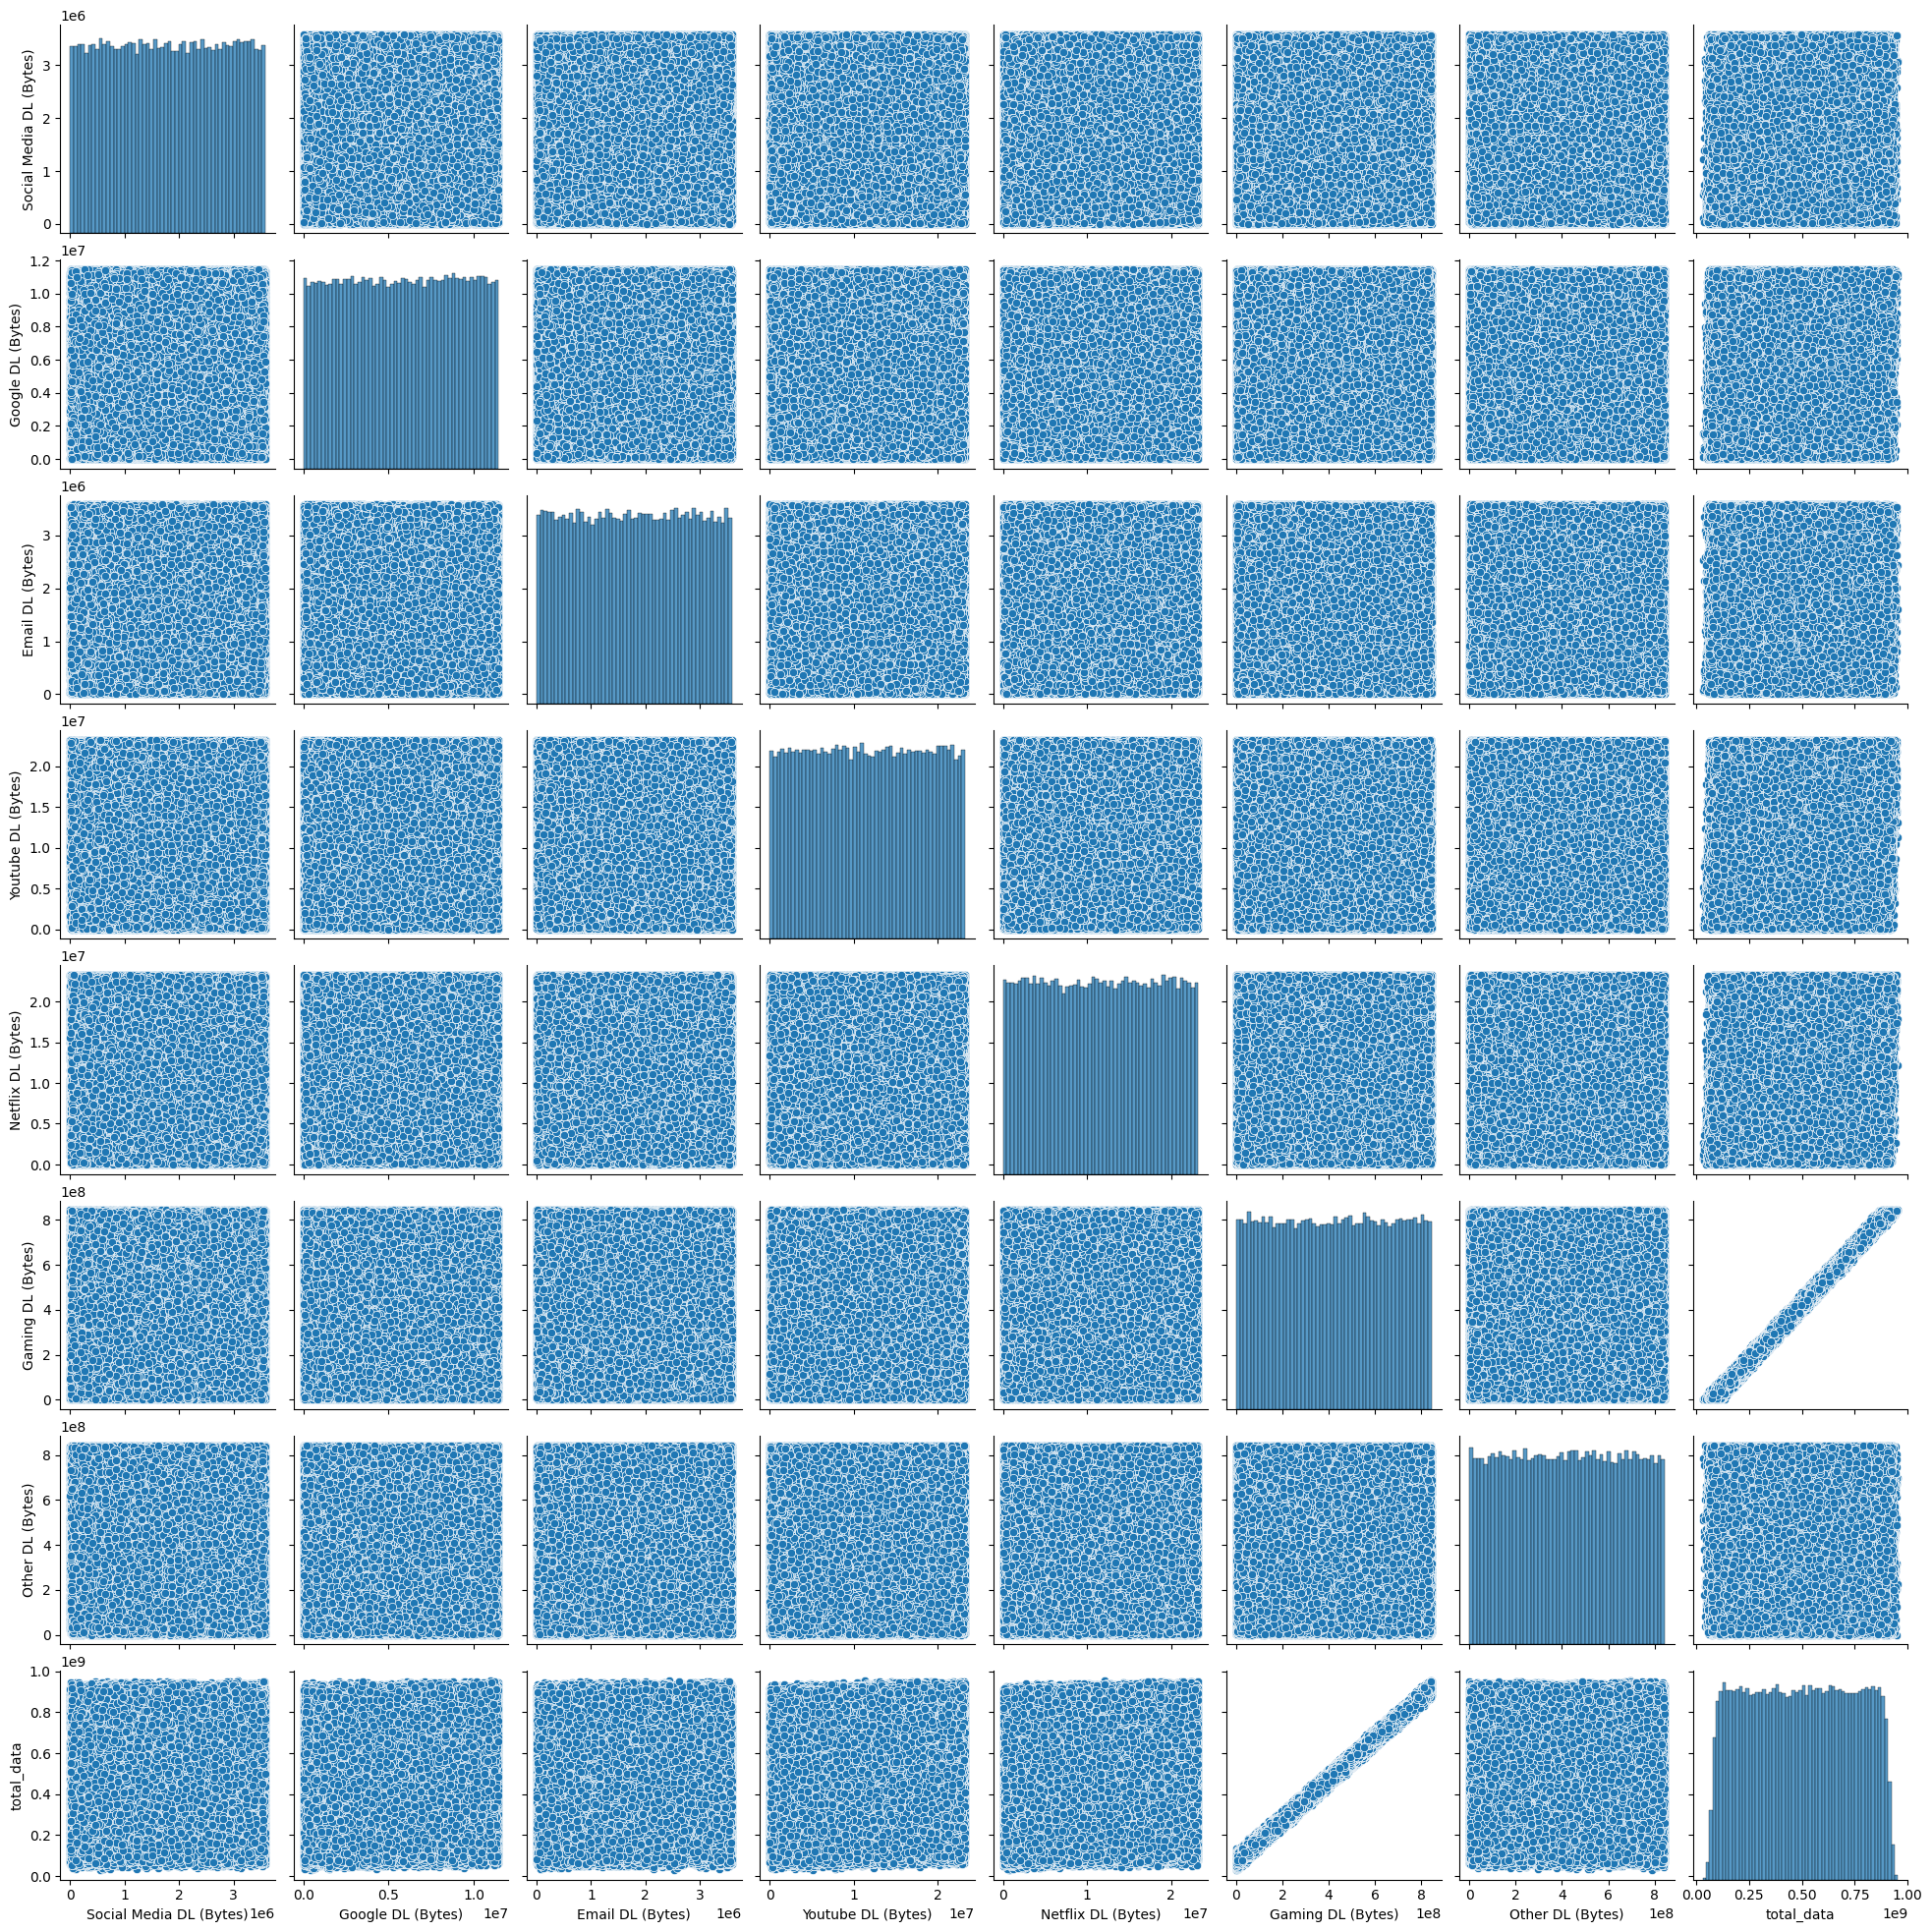

In [38]:
# Pairplot for bivariate analysis
sns.pairplot(Telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)', 'total_data']])
plt.show()

# Transforming Data Scaling and Normalization

Variable transformations – segment the users into the top five decile classes based on the total duration for all sessions and computation of the total data (DL+UL) per decile class.

In [39]:
Telcom_data['decile_class'] = pd.qcut(Telcom_data['Dur. (ms)'], 5, labels=False)
decile_totals = Telcom_data.groupby('decile_class')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum()
decile_totals['total_data'] = decile_totals.sum(axis=1)
print(decile_totals)

              Total DL (Bytes)  Total UL (Bytes)    total_data
decile_class                                                  
0                 1.364976e+13     1234287371672  1.488404e+13
1                 2.165800e+13     1962472030817  2.362047e+13
2                 5.580722e+12      506682183708  6.087404e+12
3                 1.362235e+13     1232586001756  1.485493e+13
4                 1.368615e+13     1232194499175  1.491834e+13


# Correlation Analysis

In [40]:
corr_matrix = Telcom_data[['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
                  'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)',
                  'Other DL (Bytes)']].corr()

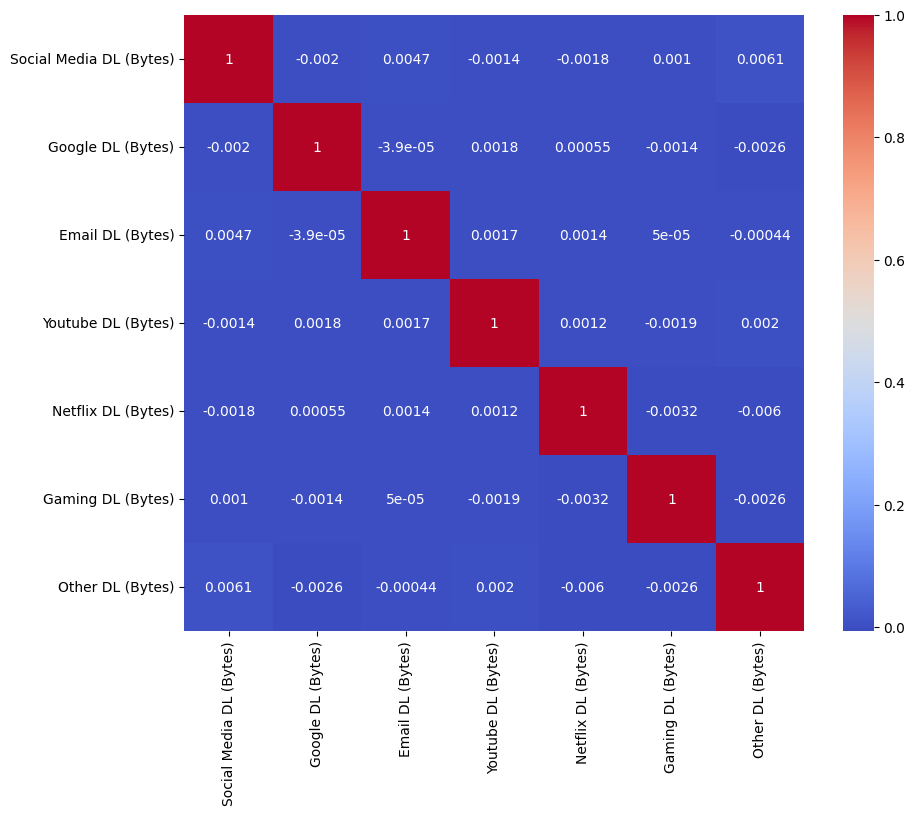

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Dimensionality Reduction (PCA)

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [43]:
features = ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)',
            'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']
x = Telcom_data[features].values
x = StandardScaler().fit_transform(x)

In [44]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca.explained_variance_ratio_)

[0.14439453 0.14355429]


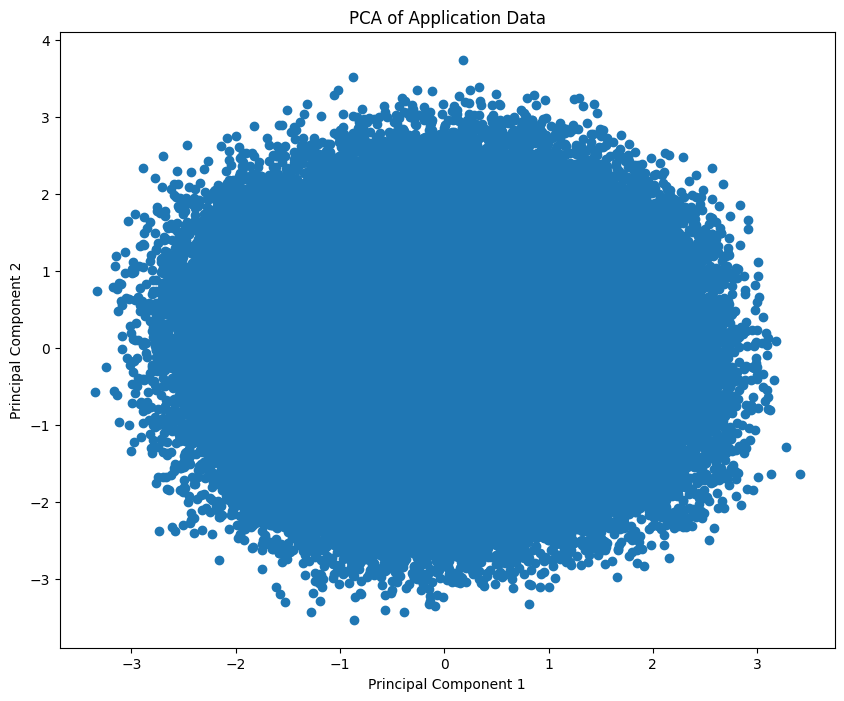

In [45]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Application Data')
plt.show()